In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *

from fastai2.data.all import *
from fastai2.vision.core import *
from fastai2.vision.data import *
import matplotlib.pyplot as plt
from fastai2.callback import *



import dlnotebooks.models._vae as vae


In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
path.ls()

(#3) [Path('C:/Users/t158185/.fastai/data/mnist_png/models'),Path('C:/Users/t158185/.fastai/data/mnist_png/testing'),Path('C:/Users/t158185/.fastai/data/mnist_png/training')]

# VAE

Variational autoencoder is used for compressing the data in lower dimension

In [ ]:
items = get_image_files(path)
tfms = [[PILImageBW.create], [PILImageBW.create]]

cv_split = RandomSplitter(seed=28)(items)
dsrc = DataSource(items, tfms,splits=cv_split )

In [ ]:
default_device??

In [ ]:
dls = dsrc.databunch(bs=16, after_item=[ToTensor()], after_batch=[IntToFloatTensor(), *aug_transforms(do_flip=False)], device=torch.device('cpu'), num_workers=0)

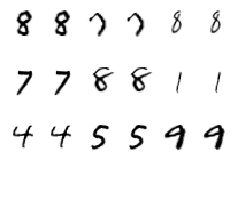

In [ ]:
dls.show_batch(rows=4, figsize=(4,4))

(array([605.,  17.,  10.,   5.,   5.,  11.,   7.,   9.,  14., 101.]),
 array([9.64525242e-08, 1.00000076e-01, 2.00000048e-01, 3.00000042e-01,
        4.00000006e-01, 5.00000000e-01, 5.99999964e-01, 6.99999928e-01,
        7.99999952e-01, 8.99999917e-01, 9.99999881e-01], dtype=float32),
 <a list of 10 Patch objects>)

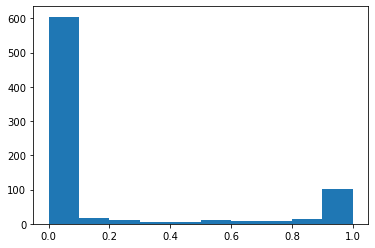

In [ ]:
plt.hist(b[0][1].view(-1,784).squeeze().cpu().numpy())

In [ ]:
b = dls.one_batch();
b[0][1].mean(), b[0][1].max(), b[0][1].min(), b[0][1].std()

(tensor(0.1780), tensor(1.0000), tensor(9.6453e-08), tensor(0.3557))

In [ ]:
model = vae.VAE(latent_size=20)
init_cnn(model)

In [ ]:
learn = Learner(dls, model, loss_func=vae.vae_loss ,opt_func=partial(Adam, wd=0.1, eps=1e-3))

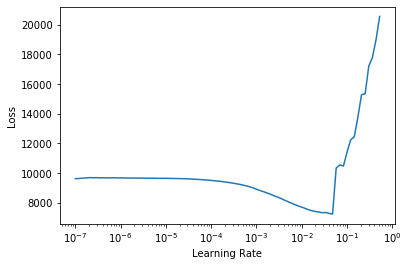

In [ ]:
learn.lr_find()